In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [8]:
row_data = pd.read_csv("training.csv")

# Task

One of the biggest challenges of an auto dealership purchasing a used car at an auto auction is the risk of that the vehicle might have serious issues that prevent it from being sold to customers. The auto community calls these unfortunate purchases "kicks".

Kicked cars often result when there are tampered odometers, mechanical issues the dealer is not able to address, issues with getting the vehicle title from the seller, or some other unforeseen problem. Kick cars can be very costly to dealers after transportation cost, throw-away repair work, and market losses in reselling the vehicle.

Modelers who can figure out which cars have a higher risk of being kick can provide real value to dealerships trying to provide the best inventory selection possible to their customers.

The challenge of this competition is to predict if the car purchased at the Auction is a Kick (bad buy).

In [9]:
def get_description(df):
    desc = {
        "RefId": "Unique (sequential) number assigned to vehicles",
        "IsBadBuy": "Identifies if the kicked vehicle was an avoidable purchase ",
        "PurchDate": "The Date the vehicle was Purchased at Auction",
        "Auction": "Auction provider at which the  vehicle was purchased",
        "VehYear": "The manufacturer's year of the vehicle",
        "VehicleAge": "The Years elapsed since the manufacturer's year",
        "Make": "Vehicle Manufacturer ",
        "Model": "Vehicle Model",
        "Trim": "Vehicle Trim Level",
        "SubModel": "Vehicle Submodel",
        "Color": "Vehicle Color",
        "Transmission": "Vehicles transmission type (Automatic, Manual)",
        "WheelTypeID": "The type id of the vehicle wheel",
        "WheelType": "The vehicle wheel type description (Alloy, Covers)",
        "VehOdo": "The vehicles odometer reading",
        "Nationality": "The Manufacturer's country",
        "Size": "The size category of the vehicle (Compact, SUV, etc.)",
        "TopThreeAmericanName": "Identifies if the manufacturer is one of the top three American manufacturers",
        "MMRAcquisitionAuctionAveragePrice": "Acquisition price for this vehicle in average condition at time of purchase	",
        "MMRAcquisitionAuctionCleanPrice": "Acquisition price for this vehicle in the above Average condition at time of purchase",
        "MMRAcquisitionRetailAveragePrice": "Acquisition price for this vehicle in the retail market in average condition at time of purchase",
        "MMRAcquisitonRetailCleanPrice": "Acquisition price for this vehicle in the retail market in above average condition at time of purchase",
        "MMRCurrentAuctionAveragePrice": "Acquisition price for this vehicle in average condition as of current day	",
        "MMRCurrentAuctionCleanPrice": "Acquisition price for this vehicle in the above condition as of current day",
        "MMRCurrentRetailAveragePrice": "Acquisition price for this vehicle in the retail market in average condition as of current day",
        "MMRCurrentRetailCleanPrice": "Acquisition price for this vehicle in the retail market in above average condition as of current day",
        "PRIMEUNIT": "Identifies if the vehicle would have a higher demand than a standard purchase",
        "AcquisitionType": "Identifies how the vehicle was aquired (Auction buy, trade in, etc)",
        "AUCGUART": "The level guarntee provided by auction for the vehicle (Green light - Guaranteed/arbitratable, Yellow Light - caution/issue, red light - sold as is)",
        "KickDate": "Date the vehicle was kicked back to the auction",
        "BYRNO": "Unique number assigned to the buyer that purchased the vehicle",
        "VNZIP1": "Zipcode where the car was purchased",
        "VNST": "State where the the car was purchased",
        "VehBCost": "Acquisition cost paid for the vehicle at time of purchase",
        "IsOnlineSale": "Identifies if the vehicle was originally purchased online",
        "WarrantyCost": "Warranty price (term=36month  and millage=36K)",
    }
    column_desc = []
    for c in df.columns:
        column_desc.append([c, df[c].dtype.name, df[c].isnull().sum(axis = 0), desc[c]])
    return pd.DataFrame(column_desc, columns=['Name', 'Type', 'Null Count', 'Description'])

In [10]:
get_description(row_data)

,Name,Type,Null Count,Description
0,RefId,int64,0,Unique (sequential) number assigned to vehicles
1,IsBadBuy,int64,0,Identifies if the kicked vehicle was an avoida...
2,PurchDate,object,0,The Date the vehicle was Purchased at Auction
3,Auction,object,0,Auction provider at which the vehicle was pur...
4,VehYear,int64,0,The manufacturer's year of the vehicle
5,VehicleAge,int64,0,The Years elapsed since the manufacturer's year
6,Make,object,0,Vehicle Manufacturer
7,Model,object,0,Vehicle Model
8,Trim,object,2360,Vehicle Trim Level
9,SubModel,object,8,Vehicle Submodel


In [11]:
print(row_data['WheelTypeID'].unique())
print(row_data['WheelType'].unique())
print(row_data['PRIMEUNIT'].unique())
print(row_data['AUCGUART'].unique())
print(row_data['TopThreeAmericanName'].unique())
print(len(row_data['Model'].unique()))
print(len(row_data['Make'].unique()))
print(row_data['SubModel'].unique()[:3])
print(row_data['Transmission'].unique())
print(row_data['Size'].unique())
print(row_data['VNST'].unique())
print(len(row_data['BYRNO'].unique()))
print(row_data['Nationality'].unique())
print(row_data['Color'].unique())
print(row_data['Auction'].unique())

[ 1.  2. nan  3.  0.]
['Alloy' 'Covers' nan 'Special']
[nan 'NO' 'YES']
[nan 'GREEN' 'RED']
['OTHER' 'CHRYSLER' 'FORD' 'GM' nan]
1063
33
['4D SEDAN I' 'QUAD CAB 4.7L SLT' '4D SEDAN SXT FFV']
['AUTO' 'MANUAL' nan 'Manual']
['MEDIUM' 'LARGE TRUCK' 'COMPACT' 'LARGE' 'VAN' 'MEDIUM SUV' 'LARGE SUV'
 'SPECIALTY' 'SPORTS' 'CROSSOVER' 'SMALL SUV' 'SMALL TRUCK' nan]
['FL' 'VA' 'IA' 'AR' 'MN' 'TN' 'PA' 'OH' 'AL' 'MI' 'TX' 'IL' 'MA' 'AZ'
 'GA' 'NC' 'MD' 'CA' 'UT' 'OR' 'SC' 'CO' 'ID' 'NV' 'WV' 'MS' 'OK' 'NM'
 'LA' 'IN' 'MO' 'WA' 'NH' 'NJ' 'NY' 'NE' 'KY']
74
['OTHER ASIAN' 'AMERICAN' 'TOP LINE ASIAN' 'OTHER' nan]
['RED' 'WHITE' 'MAROON' 'SILVER' 'BLACK' 'GOLD' 'GREY' 'BLUE' 'BEIGE'
 'PURPLE' 'ORANGE' 'GREEN' 'BROWN' 'YELLOW' 'NOT AVAIL' 'OTHER' nan]
['ADESA' 'OTHER' 'MANHEIM']


In [12]:
def fill_price(df, col):
    # I'm not sure what is the best way to fill prices
    df[col].fillna(df[col].mean(), inplace = True)

In [13]:
# DISCLAMER: I am absolutely beginner in machine learning, so some things here may be stupid

def data_fillna(df):
    res = df.drop(['RefId', 'WheelTypeID'], axis = 1)
    # I'll drop Model for now, as I don't know how to correctly encode it.
    # Making 1063 labels with one hot encoding looks bad for me, as I would use knn.
    # The same for Trim and SubModel, maybe I would need some text processing later
    # to extract features from SubModel such as 'Wagon', 'Sedan', 'Sport' etc, but I'm not there yet
    res = res.drop(['Model', 'Trim', 'SubModel'], axis = 1) 
    
    res['WheelType'].fillna('NotSpecified', inplace = True)
    
    res['PRIMEUNIT'].fillna("NO", inplace = True)
    res['AUCGUART'].fillna('RED', inplace = True)
    
    primeunit = {'NO': 0, 'YES': 1}
    # yellow exists in dataset description
    # we assume that RED < YELLOW < GREEN
    aucguart = {'RED': -1, 'YELLOW': 0, 'GREEN': 1} 
    
    res['PRIMEUNIT'].replace(primeunit, inplace = True)
    res['AUCGUART'].replace(aucguart, inplace = True)
    
    res['TopThreeAmericanName'].fillna('OTHER', inplace = True)

    res['AutoTransmition'] = res.apply(lambda t: t['Transmission'] == 'AUTO', axis = 1).astype(np.int64)
    res = res.drop('Transmission', axis = 1)
    
    # maybe we can do better, but as we have only 5 instances without Size, lets do stupid things
    res['Size'].fillna('MEDIUM', inplace = True) 
    
    # I think VNST gives enough information about state
    # as VNST zipcode is categorial feature, but with more instances, so I'll remove it
    res = res.drop('VNZIP1', axis = 1)
    
    # I don't really understand this feature, so, I'll ignore it for now, 
    # As it will grow my feature space to 74 features
    res = res.drop('BYRNO', axis = 1)
    
    res['Nationality'].fillna('OTHER', inplace = True)
    
    res['Color'].fillna('NOT AVAIL', inplace = True)
    
    fill_price(res, "MMRAcquisitionAuctionAveragePrice")
    fill_price(res, "MMRAcquisitionAuctionCleanPrice")
    fill_price(res, "MMRAcquisitionRetailAveragePrice")
    fill_price(res, "MMRAcquisitonRetailCleanPrice")
    fill_price(res, "MMRCurrentAuctionAveragePrice")
    fill_price(res, "MMRCurrentAuctionCleanPrice")
    fill_price(res, "MMRCurrentRetailAveragePrice")
    fill_price(res, "MMRCurrentRetailCleanPrice")
    
    res['PurchDate'] = (pd.to_datetime(res['PurchDate']).astype(np.int64)/ 10**9).astype(np.int64)
    
    return res

In [14]:
preprocessed_data = data_fillna(row_data)
print(preprocessed_data['WheelType'].unique())
print(preprocessed_data['PRIMEUNIT'].unique())
print(preprocessed_data['AUCGUART'].unique())
print(preprocessed_data['TopThreeAmericanName'].unique())
print(preprocessed_data['AutoTransmition'].unique())
print(preprocessed_data['Nationality'].unique())

['Alloy' 'Covers' 'NotSpecified' 'Special']
[0 1]
[-1  1]
['OTHER' 'CHRYSLER' 'FORD' 'GM']
[1 0]
['OTHER ASIAN' 'AMERICAN' 'TOP LINE ASIAN' 'OTHER']


In [15]:
preprocessed_data.isnull().any()

IsBadBuy                             False
PurchDate                            False
Auction                              False
VehYear                              False
VehicleAge                           False
Make                                 False
Color                                False
WheelType                            False
VehOdo                               False
Nationality                          False
Size                                 False
TopThreeAmericanName                 False
MMRAcquisitionAuctionAveragePrice    False
MMRAcquisitionAuctionCleanPrice      False
MMRAcquisitionRetailAveragePrice     False
MMRAcquisitonRetailCleanPrice        False
MMRCurrentAuctionAveragePrice        False
MMRCurrentAuctionCleanPrice          False
MMRCurrentRetailAveragePrice         False
MMRCurrentRetailCleanPrice           False
PRIMEUNIT                            False
AUCGUART                             False
VNST                                 False
VehBCost   

In [16]:
preprocessed_data.dtypes

IsBadBuy                               int64
PurchDate                              int64
Auction                               object
VehYear                                int64
VehicleAge                             int64
Make                                  object
Color                                 object
WheelType                             object
VehOdo                                 int64
Nationality                           object
Size                                  object
TopThreeAmericanName                  object
MMRAcquisitionAuctionAveragePrice    float64
MMRAcquisitionAuctionCleanPrice      float64
MMRAcquisitionRetailAveragePrice     float64
MMRAcquisitonRetailCleanPrice        float64
MMRCurrentAuctionAveragePrice        float64
MMRCurrentAuctionCleanPrice          float64
MMRCurrentRetailAveragePrice         float64
MMRCurrentRetailCleanPrice           float64
PRIMEUNIT                              int64
AUCGUART                               int64
VNST      

In [17]:
# Ok, looks like we have no more nulls, uff..
# Now we need to do some plots
# lets start with correlation matrix

In [18]:
corr = preprocessed_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,IsBadBuy,PurchDate,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,VehBCost,IsOnlineSale,WarrantyCost,AutoTransmition
IsBadBuy,1,0.0151154,-0.158886,0.167164,0.0825604,-0.109245,-0.102947,-0.0874127,-0.0836597,-0.108912,-0.103829,-0.103723,-0.100061,-0.00232733,-0.0570537,-0.0999115,-0.0036975,0.0523193,0.00404541
PurchDate,0.0151154,1,0.211548,0.0401193,0.133065,0.0826928,0.0818697,0.413733,0.391624,0.0651426,0.0686751,0.364571,0.347583,0.0378934,0.317591,0.14392,0.109105,-0.0381878,-0.0404026
VehYear,-0.158886,0.211548,1,-0.957957,-0.283719,0.581079,0.532866,0.581124,0.539168,0.589013,0.54675,0.59666,0.556961,0.00128514,0.0136421,0.349965,0.0573802,-0.268696,0.0548845
VehicleAge,0.167164,0.0401193,-0.957957,1,0.319794,-0.565625,-0.518751,-0.460802,-0.426333,-0.573781,-0.530816,-0.502462,-0.46787,0.00605612,0.0475236,-0.312329,-0.0247714,0.25931,-0.0666902
VehOdo,0.0825604,0.133065,-0.283719,0.319794,1,-0.0170198,0.0246141,0.031302,0.0631573,-0.0284842,0.0120717,0.015765,0.0478645,0.0087242,0.0798988,-0.0620085,0.0295558,0.411718,0.0322379
MMRAcquisitionAuctionAveragePrice,-0.109245,0.0826928,0.581079,-0.565625,-0.0170198,1,0.990347,0.910391,0.910187,0.936084,0.930769,0.870144,0.869432,0.0592654,-0.037889,0.78952,0.0388179,-0.0504151,0.0993697
MMRAcquisitionAuctionCleanPrice,-0.102947,0.0818697,0.532866,-0.518751,0.0246141,0.990347,1,0.902718,0.918242,0.922174,0.930664,0.859378,0.869849,0.0620018,-0.0355836,0.781199,0.0386672,-0.0206436,0.0989873
MMRAcquisitionRetailAveragePrice,-0.0874127,0.413733,0.581124,-0.460802,0.031302,0.910391,0.902718,1,0.990201,0.849914,0.847678,0.91125,0.904211,0.0637264,0.0466412,0.745824,0.0806272,-0.0534421,0.0732826
MMRAcquisitonRetailCleanPrice,-0.0836597,0.391624,0.539168,-0.426333,0.0631573,0.910187,0.918242,0.990201,1,0.845278,0.854036,0.901443,0.905058,0.0655905,0.0422452,0.744664,0.0776694,-0.0269318,0.0753512
MMRCurrentAuctionAveragePrice,-0.108912,0.0651426,0.589013,-0.573781,-0.0284842,0.936084,0.922174,0.849914,0.845278,1,0.990329,0.915073,0.912231,0.0573925,-1.77154e-05,0.77711,0.0398631,-0.0567132,0.102614


In [19]:
# prices looks very correlated, but I don't know what to to with that
# will wait next lecture about it

([<matplotlib.axis.XTick at 0x7f86bbcd86a0>,
 <a list of 2 Text xticklabel objects>)

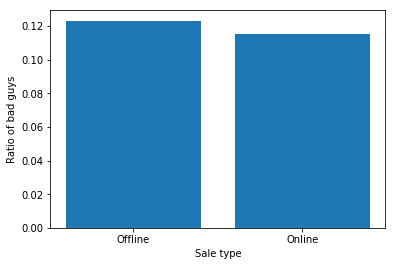

In [20]:
onlineBadGuyRatio = preprocessed_data.groupby("IsOnlineSale").mean()['IsBadBuy']
x_labels = ['Offline', 'Online']
plt.bar([0,1], onlineBadGuyRatio)
plt.ylabel('Ratio of bad guys')
plt.xlabel('Sale type')
plt.xticks([0,1], x_labels)


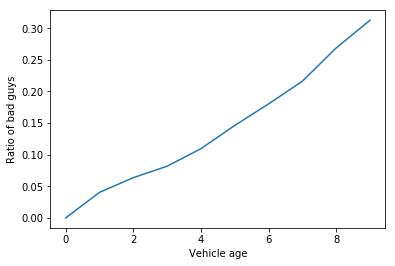

In [21]:
badGuyRatioPerAge = preprocessed_data.groupby('VehicleAge')['IsBadBuy'].mean()
plt.ylabel('Ratio of bad guys')
plt.xlabel('Vehicle age')
plt.plot(badGuyRatioPerAge)

In [22]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

def final_data_preparation(df):
    nonbinary_cols = list(filter(lambda c: df[c].dtype == object, df.columns))
    data_nonbinary = pd.get_dummies(df[nonbinary_cols])
    tmp = df.drop(nonbinary_cols, axis=1)
    tmp = pd.concat((tmp, data_nonbinary), axis = 1)
    # we normalize also binary data, assuming it is [0, 1]
    y = tmp['IsBadBuy'].get_values()
    X = tmp.drop('IsBadBuy', axis = 1).get_values()
    X = min_max_scaler.fit_transform(X)
    return (X, y)

In [23]:
X, y = final_data_preparation(preprocessed_data)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5, algorithm='kd_tree', n_jobs = -1)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

In [26]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)

In [27]:
err_test

0.10906350619990408

In [28]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[12711   194]
 [ 1398   294]]


In [29]:
# looks pretty bad
# internet told that random forest works pretty good for unbalanced data
# lets try it 

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfs_pred = rfc.predict(X_test)

/home/fexolm/.anaconda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [30]:
np.mean(y_test  != rfs_pred)

0.09995204494074125

In [31]:
print(confusion_matrix(y_test, rfs_pred))

[[12789   116]
 [ 1343   349]]


In [32]:
# a bit better, but awful anyway
# lets try svm with penalty to false negatives
from sklearn.svm import SVC
svc = SVC(gamma='auto', class_weight='balanced')
svc.fit(X_train, y_train)

svc_predicted = svc.predict(X_test)
print(np.mean(y_test  != svc_predicted))
print(confusion_matrix(y_test, svc_predicted))


0.2290881688018086
[[10299  2606]
 [  738   954]]
None


In [39]:
# LAB2 PCA

In [33]:
from sklearn.decomposition import PCA

In [38]:
results = [svc_predicted]
for components in range(1, 7):
    svc = SVC(gamma='auto', class_weight='balanced')
    pca = PCA(n_components=components)
    pca.fit(X_train)
    
    svc.fit(pca.transform(X_train), y_train)
    res = svc.predict(pca.transform(X_test))
    print(confusion_matrix(y_test, res))
    results.append(res)

[[4495 8410]
 [ 465 1227]]
[[8413 4492]
 [ 688 1004]]
[[8182 4723]
 [ 682 1010]]
[[9276 3629]
 [ 794  898]]
[[9679 3226]
 [ 840  852]]
[[10537  2368]
 [  895   797]]


In [ ]:
# It looks like PCA doesn't improve results much. But it reduce training time well.